# 2. Vorhersage des Immobilienpreises (1/2)

Ziel dieser Teilaufgabe ist die Vorhersage des Preises (Attribut `PurchasePrice`).

Die Aufgabenstellung ist zwei Teilschritte gegliedert, die Verständnisgewinn und erfolgreiches Lösen der Aufgabenstellung unterstützen sollen:

# 2.1 Einfache lineare Regression und Residuenanalyse

Verwende ein einfaches lineares Modell zur Vorhersage von `price_cleaned` mit dem Attribut `Space extracted` oder `Floor_space_merged` (es gibt einige, wo beide fehlen (um die 800, können ignoriert werden).

Entwickle das Modell in einem Notebook. Untersuche dabei ob die Annahmen eines linearen Modells erfüllt sind mit geeigneten Darstellungen. Wie können Variablen-Transformationen verwendet werden, um die Modellvoraussetzungen besser zu erfüllen und das Modell zu verbessern?

Rapportiere und diskutiere die erreichte Genauigkeit der Vorhersage mit mehreren sinnvollen Metriken und auf unabhängigen Testdaten.

Abgabe

Notebook und daraus erstellter Bericht (ohne Code) als pdf.

In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Import sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load raw dataframe 
df = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/immoscout_cleaned_lat_lon_fixed_v9.csv", usecols = ["Floor_space_merged", "Space extracted", "price_cleaned"])

# display DataFrame
display("DataFrame for simple linear Regression", df)

'DataFrame for simple linear Regression'

,Floor_space_merged,price_cleaned,Space extracted
0,NaN,1150000.0,100.0
1,242 m²,1420000.0,156.0
2,NaN,720000.0,93.0
3,257 m²,1430000.0,154.0
4,NaN,995000.0,142.0
...,...,...,...
13373,NaN,1101000.0,70.0
13374,NaN,1750000.0,NaN
13375,NaN,1415000.0,150.0
13376,140 m²,1465000.0,145.0


# Missing Values

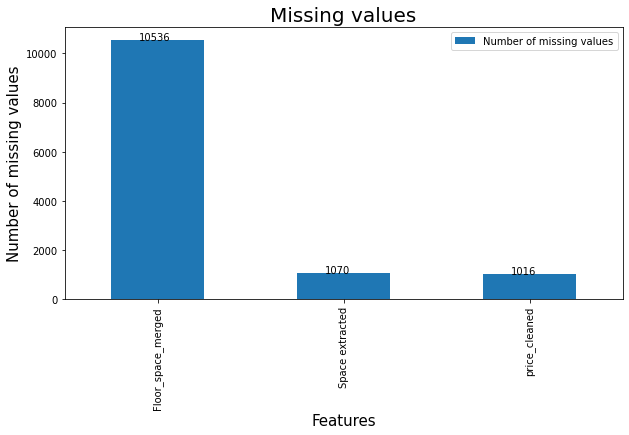

(13378, 3)

In [4]:
# Visualize missing values with barplot and number of missing value on top of each bar
def missing_values_barplot(df):
    """
    Visualize missing values with barplot and number of missing value on top of each bar
    Args:
        df (DataFrame): DataFrame with missing values
    """
    # Calculate number of missing values
    missing_values = df.isnull().sum().sort_values(ascending=False)
    # Concatenate number of missing values and percentage of missing values
    missing_values = pd.concat([missing_values], axis=1, keys=['Number of missing values'])
    # Plot barplot
    missing_values.plot(kind='bar', figsize=(10, 5))
    # Add number of missing values on top of each bar
    for i in range(len(missing_values)):
        plt.text(x = i-0.1 , y = missing_values['Number of missing values'][i], s = missing_values['Number of missing values'][i], size = 10)
    # Set title
    plt.title('Missing values', fontsize=20)
    # Set x-label
    plt.xlabel('Features', fontsize=15)
    # Set y-label
    plt.ylabel('Number of missing values', fontsize=15)
    # Display plot
    plt.show()

# Visualize missing values with barplot and number of missing value on top of each bar
missing_values_barplot(df)

# shape of dataframe
df.shape

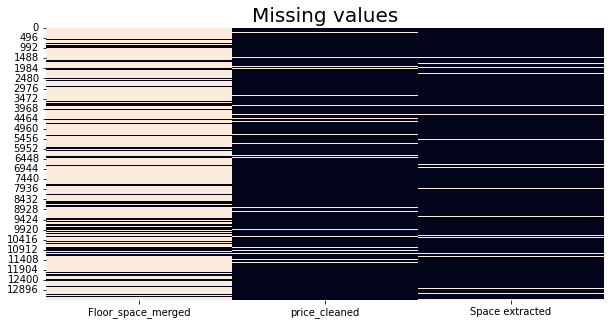

In [3]:
# Create heatmap isna map
def heatmap_isna(df):
    """
    Create heatmap isna map
    Args:
        df (DataFrame): DataFrame with missing values
    """
    # figure size
    plt.figure(figsize=(10, 5))
    # Create heatmap isna map
    sns.heatmap(df.isnull(), cbar=False)
    # Set title
    plt.title('Missing values', fontsize=20)
    # Display plot
    plt.show()

# Create heatmap isna map
heatmap_isna(df)

We are selecting space_extracted as feature and price_cleaned as target. 
Floor_space_merged wont be used for the linear regression modell, beceause there are over 10000 missing values out
from 13378 observations. in The heatmap Visualization we can also see, if the NaN values of price_cleaned and Space extracted are on the same rows. 
Before we will remove the NaN values, we will plot the distribution plot to see the effects, of removing NaN values.

# Distribution

In [5]:
# drop rows with missing values
df = df[["price_cleaned", "Space extracted"]]

# display df
display("DataFrame selected", df.head(2))

'DataFrame selected'

,price_cleaned,Space extracted
0,1150000.0,100.0
1,1420000.0,156.0


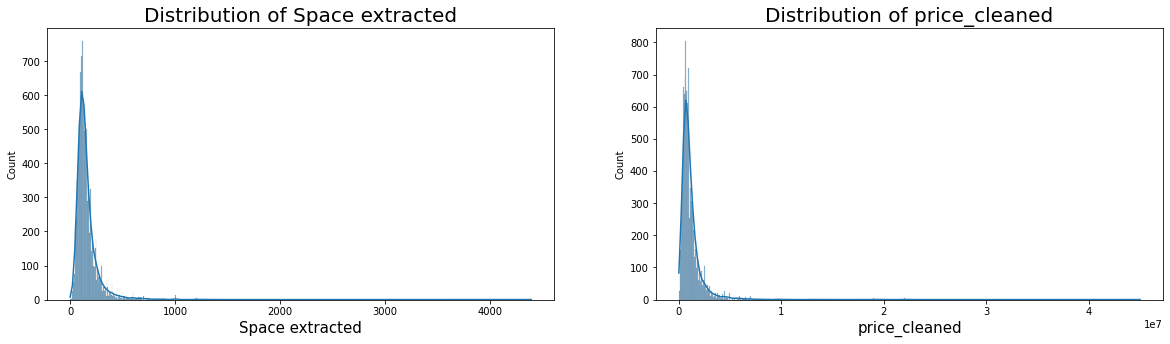

In [6]:
# Show Distribution of space_extracted and price_cleaned using histplot
def show_distribution(df, features):
    """
    Show Distribution of space_extracted and price_cleaned
    Args:
        df (DataFrame): DataFrame with missing values
        feature (list): Features to show distribution
    """

    # use fig and ax to plot
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    # Plot histplot for space_extracted
    sns.histplot(df[features[0]], ax=ax[0], kde=True)
    # Plot histplot for price_cleaned
    sns.histplot(df[features[1]], ax=ax[1], kde=True)
    # Set title for space_extracted
    ax[0].set_title('Distribution of ' + features[0], fontsize=20)
    # add label for space_extracted
    ax[0].set_xlabel(features[0], fontsize=15)

    # Set title for price_cleaned
    ax[1].set_title('Distribution of ' + features[1], fontsize=20)
    # add label for price_cleaned
    ax[1].set_xlabel(features[1], fontsize=15)
    # Display plot
    plt.show()


# Show Distribution of space_extracted and price_cleaned
show_distribution(df, ['Space extracted', 'price_cleaned'])

price_cleaned and space extracted are both right skewed distribution.
We will remove the Na values and will use the distribution function again. 

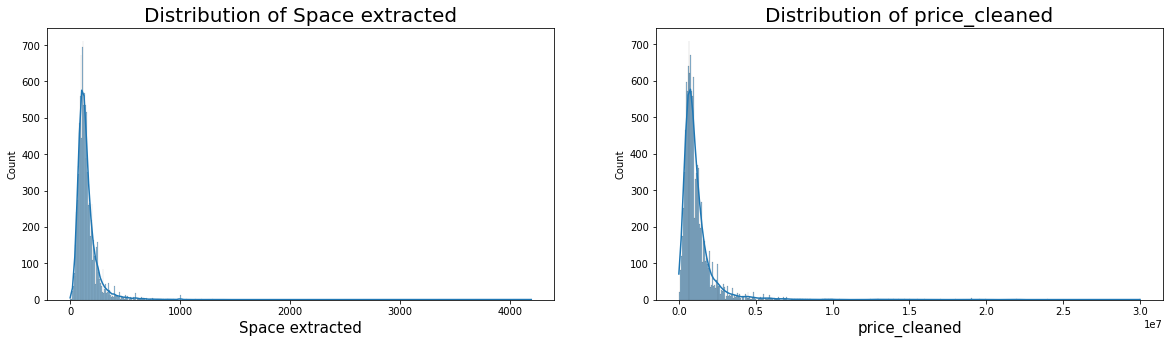

In [7]:
# drop na rows
df_clean = df.dropna()

# show distribution
show_distribution(df_clean, ['Space extracted', 'price_cleaned'])

Both distributions are still right skewed, but the space_extracted looks a little bit more like a normal distribution with a long tail to the right side. We will transform space_extraced and price_cleaned with sqrt, ln.

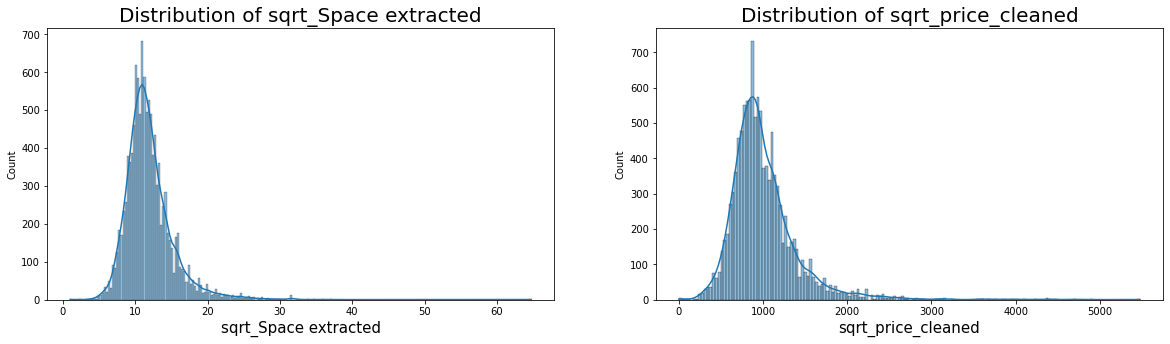

In [11]:
# copy DataFrame
df_clean_sqrt = df_clean.copy()

# np.sqrt space_extracted and price_cleaned
df_clean_sqrt['sqrt_Space extracted'] = np.sqrt(df_clean_sqrt['Space extracted'])
df_clean_sqrt['sqrt_price_cleaned'] = np.sqrt(df_clean_sqrt['price_cleaned'])

# show distribution
show_distribution(df_clean_sqrt, ['sqrt_Space extracted', 'sqrt_price_cleaned'])


If we are transforming Space_extraced and log_price with np.sqrt we can get a normal distribution. Lets try it with ln in the next step.

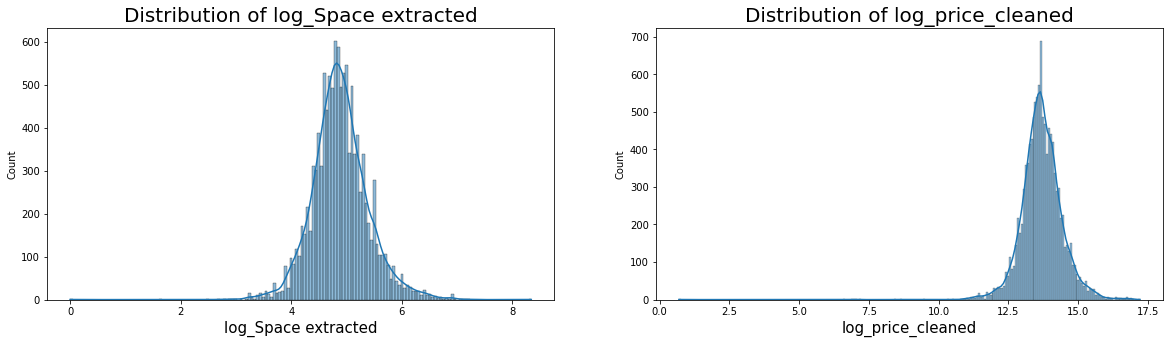

In [9]:
# copy DataFrame
df_clean_log = df_clean.copy()

# np.log space_extracted and price_cleaned
df_clean_log['log_Space extracted'] = np.log(df_clean_log['Space extracted'])
df_clean_log['log_price_cleaned'] = np.log(df_clean_log['price_cleaned'])

# show distribution
show_distribution(df_clean_log, ['log_Space extracted', 'log_price_cleaned'])


Same as with sqrt, the log is also transforming the feature and target into a normal distribution. In the next step we will concern us with the outliers.

# Simple Linear Regression with price_cleaned vs. Space extracted

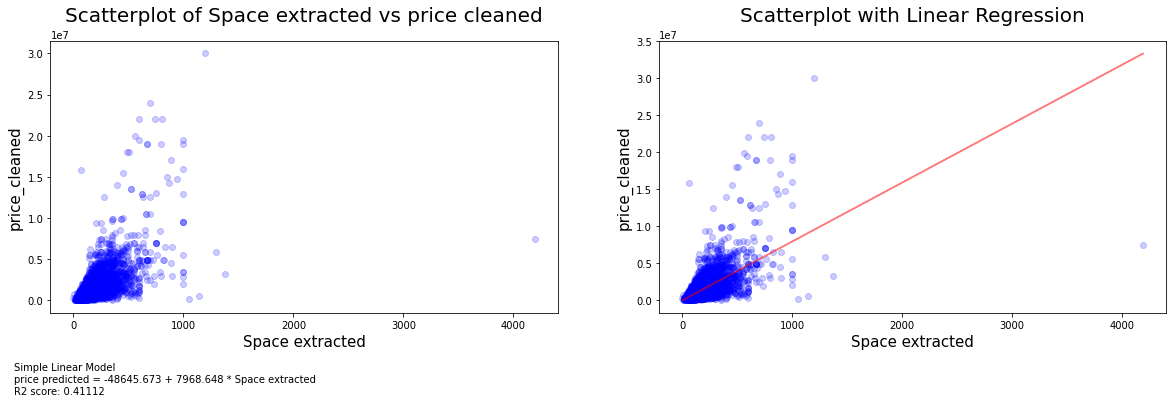

In [20]:
# Select interested cols
df_living_space_price = df_clean[['Space extracted', 'price_cleaned']]

# drop missing rows
df_living_space_price = df_living_space_price.dropna()

# create x and y variabels for regression
x = df_living_space_price['Space extracted'].values.reshape(-1, 1)
y = df_living_space_price['price_cleaned'].values.reshape(-1, 1)

# creating sklearn Linear Regression model
model_1 = LinearRegression().fit(x, y)

# get the coefficient and intercept
coef = np.round(model_1.coef_[0][0], 3)
intercept = np.round(model_1.intercept_[0], 3)

# get the R2 score
R2_score = np.round(model_1.score(x, y), 5)

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x, y, color='blue', alpha = 0.2)
ax[0].set_title('Scatterplot of Space extracted vs price cleaned', y = 1.05, fontsize = 20)
ax[0].set_xlabel('Space extracted', fontsize = 15)
ax[0].set_ylabel('price_cleaned', fontsize = 15)

# Plot scatterplot with model
ax[1].scatter(x, y, color='blue', alpha = 0.2)
ax[1].plot(x, model_1.predict(x), color='red', alpha = 0.5)
ax[1].set_title('Scatterplot with Linear Regression', y = 1.05, fontsize = 20)
ax[1].set_xlabel('Space extracted', fontsize=15)
ax[1].set_ylabel('price_cleaned', fontsize=15)

fig.text(0.1, -0.1, "Simple Linear Model\
    \nprice predicted = " + str(intercept) + " + " + str(coef) + " * Space extracted" + "\
    \nR2 score: " + str(R2_score), fontsize = 10)

plt.show()

## Residuenanalyse

For the residueanalyse we are checking three conditions:
- The error shouldn’t be dependent
- The expected value should be around 0
- The residuals should follow normal distribution

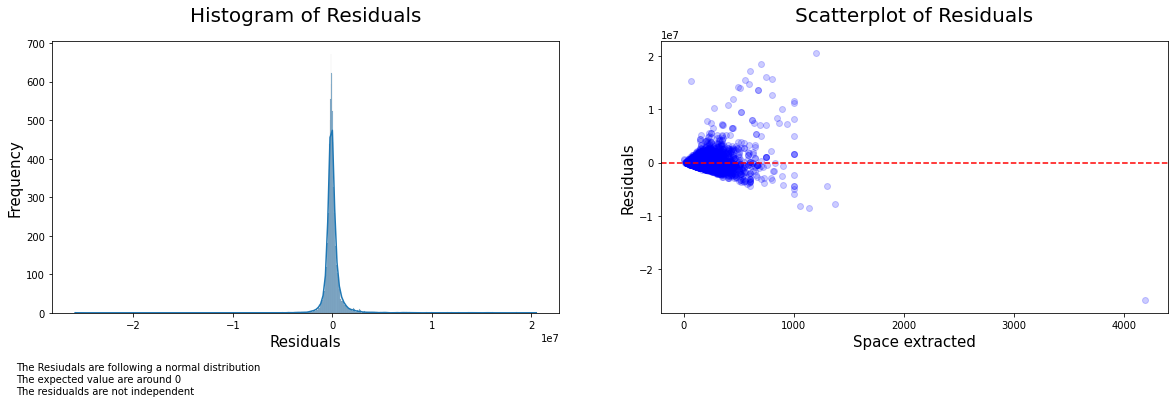

In [29]:
# calculte Residuals
residuals = y - model_1.predict(x)

# Visualize Residuals with fig and 2
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# Plot histogram of residuals
sns.histplot(residuals, kde=True, ax=ax[0], legend = False)
ax[0].set_title('Histogram of Residuals', y = 1.05, fontsize = 20)
ax[0].set_xlabel('Residuals', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].scatter(x, residuals, color='blue', alpha = 0.2)
# draw horizontal line at y=0
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Scatterplot of Residuals', y = 1.05, fontsize = 20)
ax[1].set_xlabel('Space extracted', fontsize=15)
ax[1].set_ylabel('Residuals', fontsize=15)
fig.text(0.1, -0.1, "The Resiudals are following a normal distribution\
    \nThe expected value are around 0\
    \nThe residualds are not independent", fontsize = 10)
plt.show()

The resiudals are not independent. The values arent around 0.

## Conclusion from model_1

Model_1 has an R^2 from 0.4111. But unfortunatly the residuals are note independent and therefore we need to transform ether the x-axis or the y-axis. 



# Simple Lineare Regression with logarithmic transformation

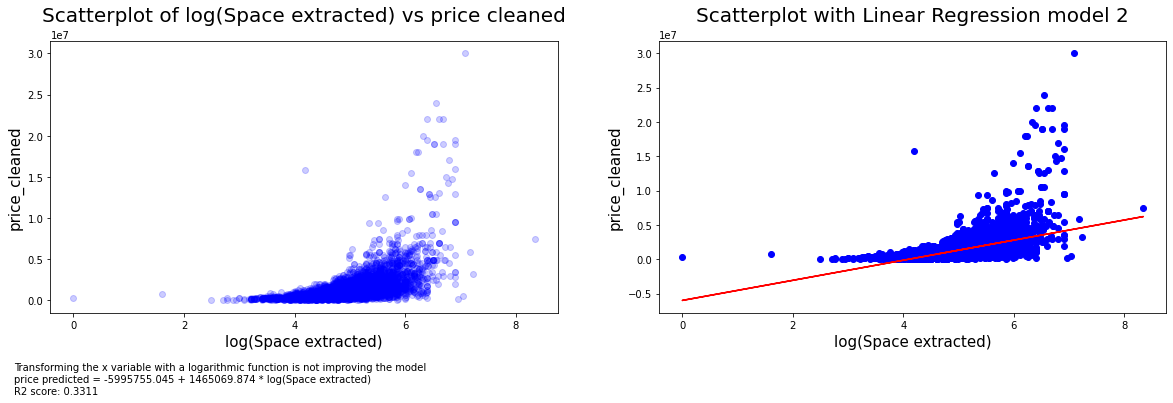

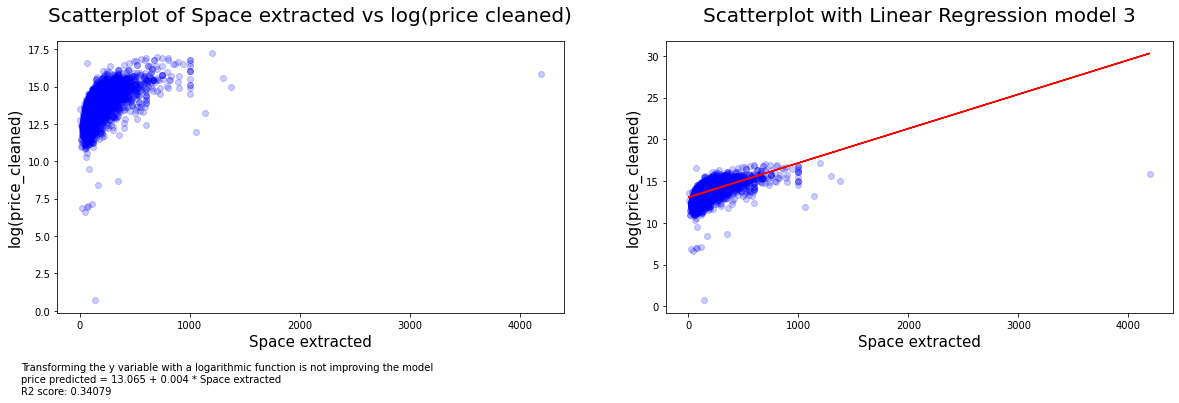

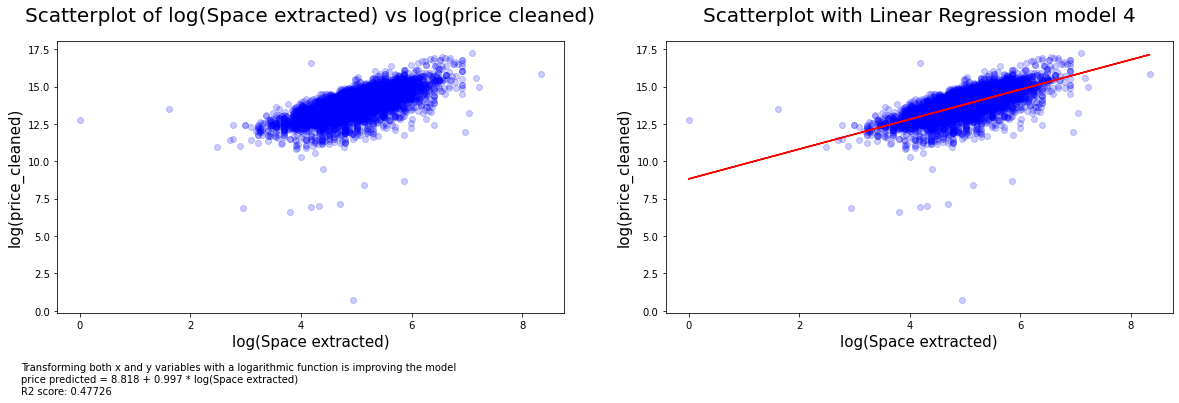

In [60]:
# Select interested cols
df_living_space_price = df[['Space extracted', 'price_cleaned']]
# drop missing rows
df_living_space_price = df_living_space_price.dropna()

# create x and y variabels for regression
x = df_living_space_price['Space extracted'].values.reshape(-1, 1)
y = df_living_space_price['price_cleaned'].values.reshape(-1, 1)
# Logarithmic transformation of x and y
x_log = np.log(x)
y_log = np.log(y)

# creating sklearn Linear Regression model
model_2 = LinearRegression().fit(x_log, y)
model_3 = LinearRegression().fit(x, y_log)
model_4 = LinearRegression().fit(x_log, y_log)

# get the coefficient and intercept
coef2 = np.round(model_2.coef_[0][0], 3)
intercept2 = np.round(model_2.intercept_[0], 3)

coef3 = np.round(model_3.coef_[0][0], 3)
intercept3 = np.round(model_3.intercept_[0], 3)

coef4 = np.round(model_4.coef_[0][0], 3)
intercept4 = np.round(model_4.intercept_[0], 3)

# get the R2 score
R2_score2 = np.round(model_2.score(x_log, y), 5)
R2_score3 = np.round(model_3.score(x, y_log), 5)
R2_score4 = np.round(model_4.score(x_log, y_log), 5)

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x_log, y, color='blue', alpha = 0.2)
ax[0].set_title('Scatterplot of log(Space extracted) vs price cleaned', y = 1.05, fontsize = 20)
ax[0].set_xlabel('log(Space extracted)', fontsize = 15)
ax[0].set_ylabel('price_cleaned', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x_log, y, color='blue')
ax[1].plot(x_log, model_2.predict(x_log), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 2', y = 1.05, fontsize = 20)
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('price_cleaned', fontsize=15)
fig.text(0.1, -0.1, "Transforming the x variable with a logarithmic function is not improving the model\
    \nprice predicted = " + str(intercept2) + " + " + str(coef2) + " * log(Space extracted)" + "\
    \nR2 score: " + str(R2_score2), fontsize = 10)
plt.show()

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x, y_log, color='blue', alpha = 0.2)
ax[0].set_title('Scatterplot of Space extracted vs log(price cleaned)', y = 1.05, fontsize = 20)
ax[0].set_xlabel('Space extracted', fontsize = 15)
ax[0].set_ylabel('log(price_cleaned)', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x, y_log, color='blue', alpha = 0.2)
ax[1].plot(x, model_3.predict(x), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 3', y = 1.05, fontsize = 20)
ax[1].set_xlabel('Space extracted', fontsize=15)
ax[1].set_ylabel('log(price_cleaned)', fontsize=15)
fig.text(0.1, -0.1, "Transforming the y variable with a logarithmic function is not improving the model\
    \nprice predicted = " + str(intercept3) + " + " + str(coef3) + " * Space extracted" + "\
    \nR2 score: " + str(R2_score3), fontsize = 10)
plt.show()

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x_log, y_log, color='blue', alpha=0.2)
ax[0].set_title('Scatterplot of log(Space extracted) vs log(price cleaned)', y = 1.05, fontsize = 20)
ax[0].set_xlabel('log(Space extracted)', fontsize = 15)
ax[0].set_ylabel('log(price_cleaned)', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x_log, y_log, color='blue', alpha=0.2)
ax[1].plot(x_log, model_4.predict(x_log), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 4', y = 1.05, fontsize = 20)
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('log(price_cleaned)', fontsize=15)
fig.text(0.1, -0.1, "Transforming both x and y variables with a logarithmic function is improving the model\
    \nprice predicted = " + str(intercept4) + " + " + str(coef4) + " * log(Space extracted)" + "\
    \nR2 score: " + str(R2_score4), fontsize = 10)
plt.show()


## Residualanalysis for the log model 4

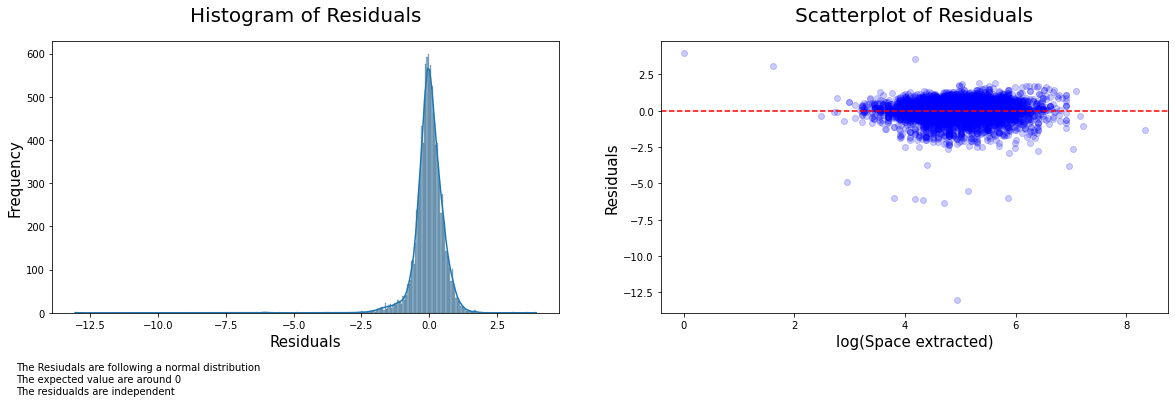

In [59]:
# calculte Residuals
residuals = y_log - model_4.predict(x_log)

# Visualize Residuals with fig and 2
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# Plot histogram of residuals
sns.histplot(residuals, kde=True, ax=ax[0], legend = False)
ax[0].set_title('Histogram of Residuals', y = 1.05, fontsize = 20)
ax[0].set_xlabel('Residuals', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].scatter(x_log, residuals, color='blue', alpha = 0.2)
# draw horizontal line at y=0
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Scatterplot of Residuals', y = 1.05, fontsize = 20)
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('Residuals', fontsize=15)
fig.text(0.1, -0.1, "The Resiudals are following a normal distribution\
    \nThe expected value are around 0\
    \nThe residualds are independent", fontsize = 10)
plt.show()

## Conclusion of log transformation

The log transformation for the x axis (space extracted) and y axis (price_cleaned) increased our model R^2 from the previous model 1: 0.4111 to our actual best model 4: 0.477
The residuals of model 4 are norm distributed and has an expected mean value of 0, also are the residuals independent.

So to improve our Model we will remove the outliers. 

# Simple Linear Regression with removed outliers

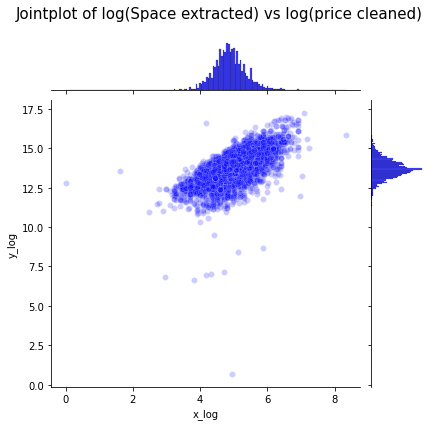

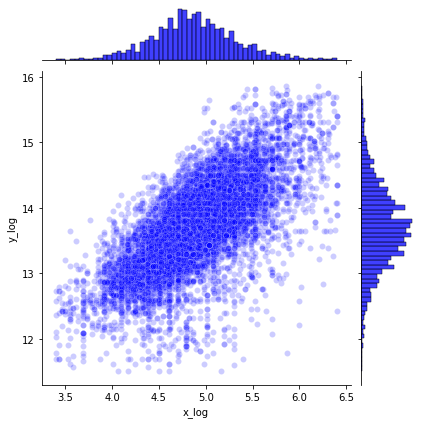

In [62]:
# create x_log and y_log dataframe
df_log_outliers = pd.DataFrame({'x_log': x_log.flatten(), 'y_log': y_log.flatten()})

# create jointplot
sns.jointplot(x='x_log', y='y_log', data=df_log_outliers, color='blue', alpha = 0.2)
plt.subplots_adjust(top=0.9)
plt.suptitle('Jointplot of log(Space extracted) vs log(price cleaned)', fontsize=15)
plt.xlabel('log(Space extracted)', fontsize=15)
plt.ylabel('log(price_cleaned)', fontsize=15)
plt.show() 

# remove every outlier with zscore > 3
from scipy import stats
df_log = df_log_outliers[(np.abs(stats.zscore(df_log_outliers)) < 3).all(axis=1)]

# create jointplot
sns.jointplot(x='x_log', y='y_log', data=df_log, color='blue', alpha = 0.2)
plt.show()


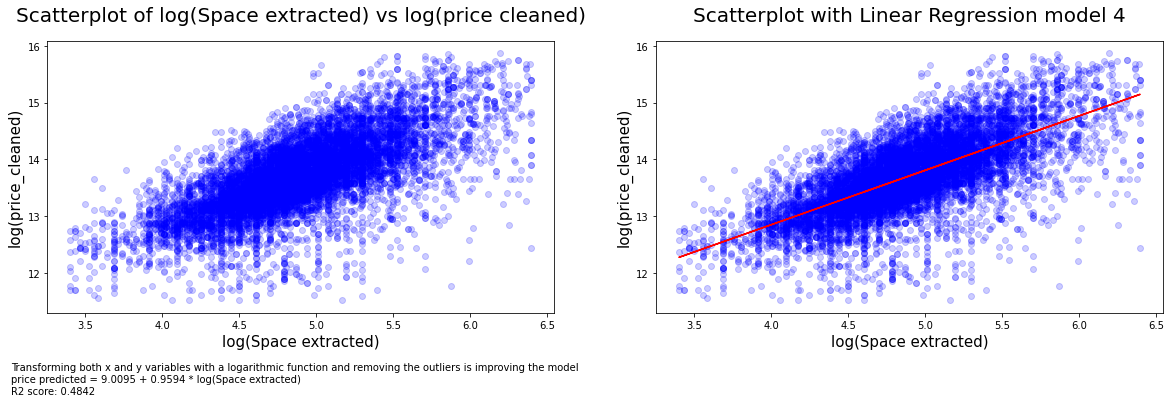

In [56]:
# create x_log and y_log 
x_log_3 = df_log['x_log'].values.reshape(-1, 1)
y_log_3 = df_log['y_log'].values.reshape(-1, 1)

# creating sklearn Linear Regression model
model_5 = LinearRegression().fit(x_log_3, y_log_3)

# get the coefficient and intercept
coef5 = round(model_5.coef_[0][0], 4)
intercept5 = round(model_5.intercept_[0], 4)

# get the R2 score
R2_score5 = round(model_5.score(x_log_3, y_log_3), 4)

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x_log_3, y_log_3, color='blue', alpha = 0.2)
ax[0].set_title('Scatterplot of log(Space extracted) vs log(price cleaned)', y = 1.05, fontsize = 20)
ax[0].set_xlabel('log(Space extracted)', fontsize = 15)
ax[0].set_ylabel('log(price_cleaned)', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x_log_3, y_log_3, color='blue', alpha = 0.2)
ax[1].plot(x_log_3, model_5.predict(x_log_3), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 4', y = 1.05, fontsize = 20)
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('log(price_cleaned)', fontsize=15)
fig.text(0.1, -0.1, "Transforming both x and y variables with a logarithmic function and removing the outliers is improving the model\
    \nprice predicted = " + str(intercept5) + " + " + str(coef5) + " * log(Space extracted)" + "\
    \nR2 score: " + str(R2_score5), fontsize = 10)
plt.show()


## Residual Analysis of model 5

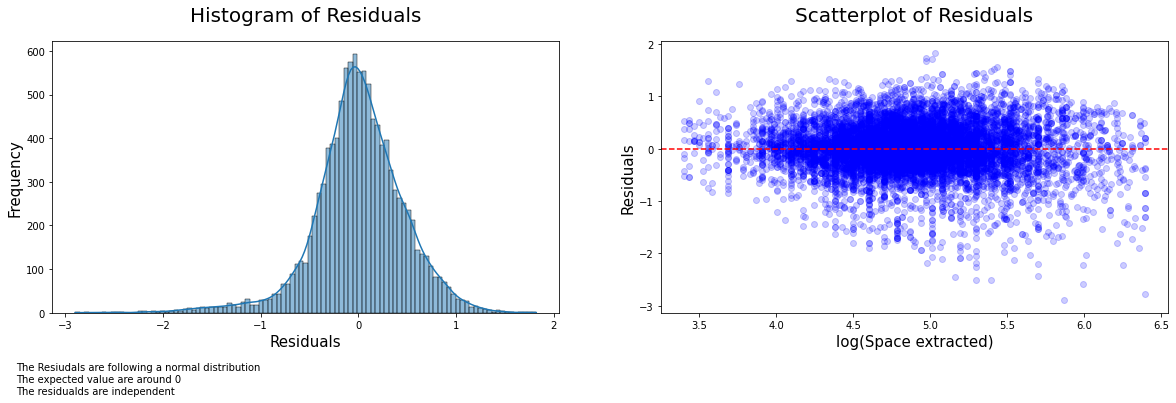

In [65]:
# calculte Residuals
residuals = y_log_3 - model_4.predict(x_log_3)

# Visualize Residuals with fig and 2
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# Plot histogram of residuals
sns.histplot(residuals, kde=True, ax=ax[0], legend = False)
ax[0].set_title('Histogram of Residuals', y = 1.05, fontsize = 20)
ax[0].set_xlabel('Residuals', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].scatter(x_log_3, residuals, color='blue', alpha = 0.2)
# draw horizontal line at y=0
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Scatterplot of Residuals', y = 1.05, fontsize = 20)
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('Residuals', fontsize=15)
fig.text(0.1, -0.1, "The Resiudals are following a normal distribution\
    \nThe expected value are around 0\
    \nThe residualds are independent", fontsize = 10)
plt.show()

## Conclusion of remove outliers

The model improved a little bit, when the outliers zscore >= 3 are removed. 
The R^2 increases from 0.47 to 0.48. 

The residual analysis are also good.

# Model Summary

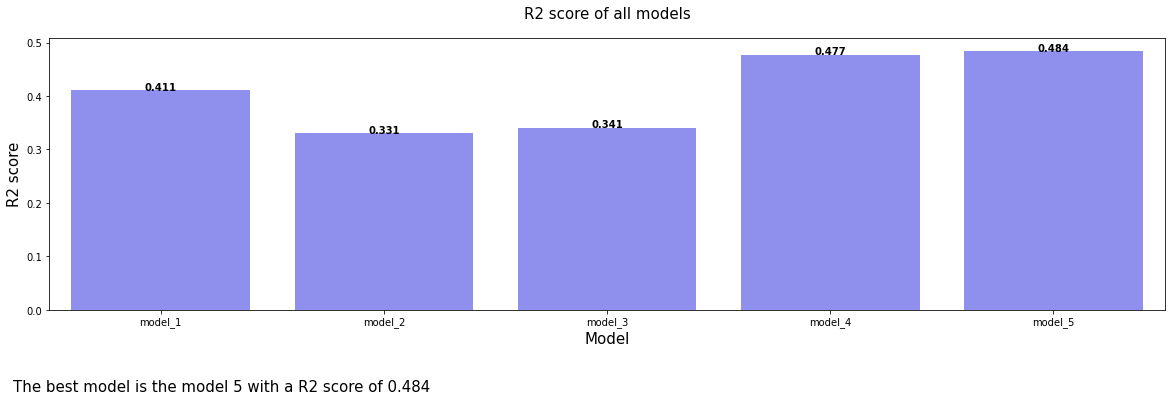

In [74]:
# Create empty Dictionary to store model as value and key for parameters
model_dict = {}

model_dict["model_1"] = {'intercept': model_1.intercept_[0], 'coefficient': model_1.coef_[0][0], 'R2': model_1.score(x, y)}
model_dict["model_2"] = {'intercept': model_2.intercept_[0], 'coefficient': model_2.coef_[0][0], 'R2': model_2.score(x_log, y)}
model_dict["model_3"] = {'intercept': model_3.intercept_[0], 'coefficient': model_3.coef_[0][0], 'R2': model_3.score(x, y_log)}
model_dict["model_4"] = {'intercept': model_4.intercept_[0], 'coefficient': model_4.coef_[0][0], 'R2': model_4.score(x_log, y_log)}
model_dict["model_5"] = {'intercept': model_5.intercept_[0], 'coefficient': model_5.coef_[0][0], 'R2': model_5.score(x_log_3, y_log_3)}

# create dataframe from model_dict and remove index
df_model = pd.DataFrame(model_dict).T.reset_index()

# Visualize R2 score with barplot sort R^2 add number on top of bar
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='index', y='R2', data=df_model, ax=ax, color='blue', alpha = 0.5)
ax.set_title('R2 score of all models', fontsize = 15, y = 1.05)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('R2 score', fontsize=15)
for i, v in enumerate(df_model['R2']):
    ax.text(i, v, str(round(v, 3)), color='black', fontweight='bold', ha='center')
fig.text(0.1, -0.1, "The best model is the model 5 with a R2 score of 0.484", fontsize = 15)
plt.show()


In [ ]:
# MAE, MAPE, RMSE

Model 5 has the highest score R^2 of 0.484 
Consider that we are only allowed to use one feature it is okay. 
Therefore with the multiple lineare regression model, we should get a higher R^2 score.